<a href="https://colab.research.google.com/github/thegrouch4413/Predictive-Analysis/blob/main/Banking_Analysis_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Data

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/banking.txt', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


#EDA

Text(0, 0.5, 'Frequency of Purchase')

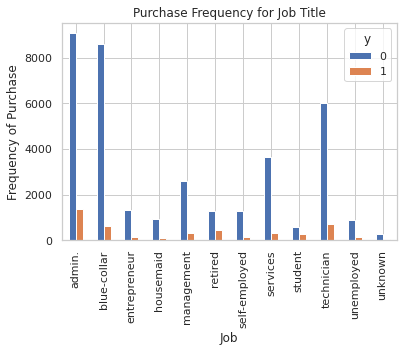

In [4]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Job Title is great indicator for frequency of purchase

In [5]:
data['education']=np.where(data['education'] =='basic.9y', 'College Degree', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'College Degree', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'College Degree', data['education'])
data['education']=np.where(data['education'] =='university.degree', 'College Degree', data['education'])

Combining all college/university degrees allows us to reduce columns

Text(0, 0.5, 'Proportion of Customers')

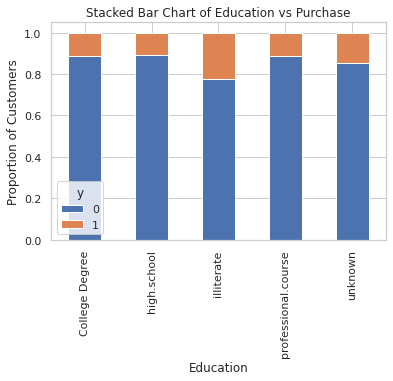

In [6]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

EDucation is a good indicator of purchase as it is a good indicator of income.

Text(0, 0.5, 'Frequency of Purchase')

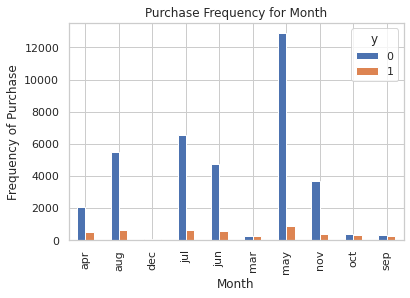

In [7]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Month purchased is another good indicator of purchase.

Text(0, 0.5, 'Frequency of Purchase')

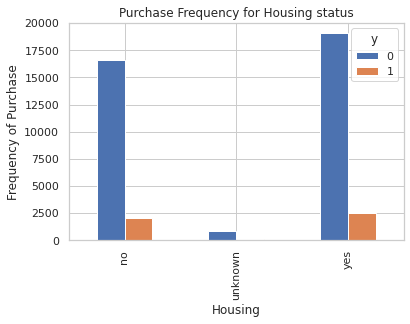

In [9]:
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Housing status')
plt.xlabel('Housing')
plt.ylabel('Frequency of Purchase')

Believe it or not housing status is not a good indicator of purchase

Text(0, 0.5, 'Frequency of Purchase')

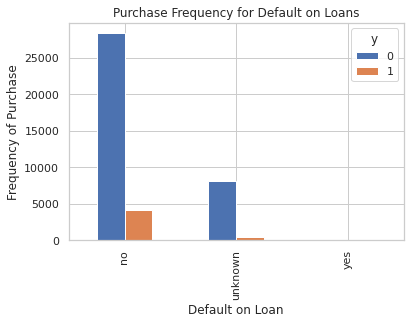

In [10]:
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Default on Loans')
plt.xlabel('Default on Loan')
plt.ylabel('Frequency of Purchase')

Default status is a good indicator of purchase as those not defaulted are more likely to purchase 

Text(0, 0.5, 'Frequency of Purchase')

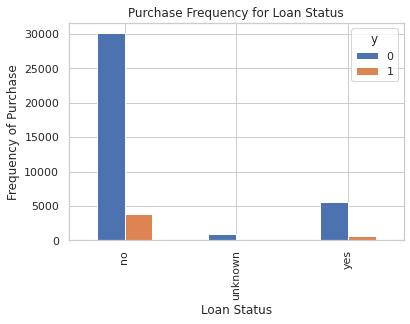

In [11]:
pd.crosstab(data.loan,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency of Purchase')

Loan status is a good indicator as those without loans were more likely to purchase

Text(0, 0.5, 'Frequency of Purchase')

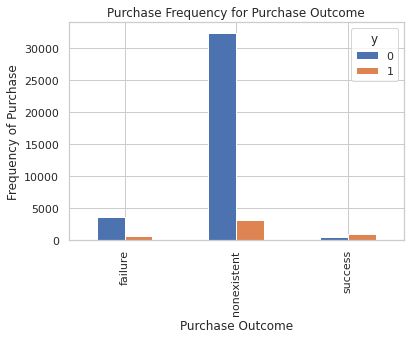

In [12]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Purchase Outcome')
plt.xlabel('Purchase Outcome')
plt.ylabel('Frequency of Purchase')

Poutcome is also a good indicator 

In [ ]:
category_variables=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in category_variables:
    category_list='var'+'_'+var
    category_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(category_list)
    data=data1

In [ ]:
category_variables=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in category_variables]
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_College Degree',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_m

Over-sampling using SMOTE

In [ ]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [ ]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [ ]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

##Implementing the model

In [ ]:
cols=[ 'job_blue-collar', 'job_housemaid', 'job_admin.', 'education_illiterate', 'default_no', 'default_unknown', 
      'job_entrepreneur', 'job_management', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success", 'job_retired', 'job_self-employed', 'job_services', 'job_student',
      'job_technician', 'job_unemployed', 'job_unknown', 'education_College Degree', 'education_high.school', 'education_professional.course', 'education_unknown',
      'loan_yes', 'loan_no'] 
X=os_data_X[cols]
y=os_data_y['y']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.349909
         Iterations 8
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.495     
Dependent Variable:      y                    AIC:                  35848.5304
Date:                    2022-04-13 20:28     BIC:                  36131.4809
No. Observations:        51134                Log-Likelihood:       -17892.   
Df Model:                31                   LL-Null:              -35443.   
Df Residuals:            51102                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          8.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


By using education, jobs, default and loan statuses, we are able to determine the outcome of purchase pretty accurately.

## Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6235  170]
 [ 823 5556]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      6405
           1       0.97      0.87      0.92      6379

    accuracy                           0.92     12784
   macro avg       0.93      0.92      0.92     12784
weighted avg       0.93      0.92      0.92     12784



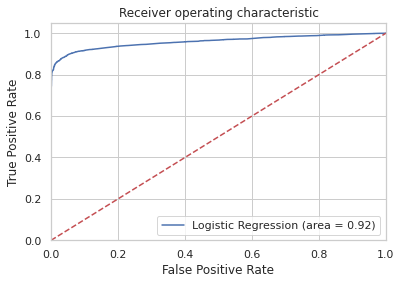

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()